In [29]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
from os.path import join as oj
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
sys.path.append('../src')
import numpy as np
import data_pecarn, data_psrc
from validate import calc_stats
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import itertools

df = pd.read_csv('../data/tbi/TBI PUD 10-08-2013.csv')
df['Age < 2'] = (df['AgeinYears'] < 2).map({True: 'Yes', False: 'No'})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
groups = ['Gender', 'Ethnicity', 'Race']
vals = ['ActNorm', 'Age < 2', 'AMSAgitated', 'Drugs', 'IndRqstMD', 'CTSedAge', 'Observed']
# list(sorted(df.columns))
df = df.fillna('Missing')

/Users/chandan/rules/iai-clinical-decision-rule/.iai/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


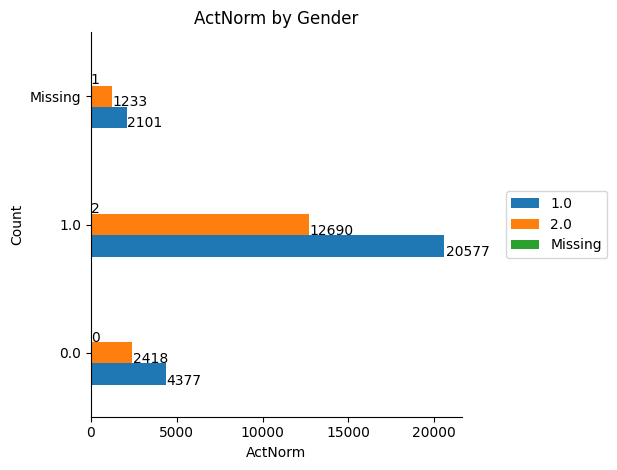

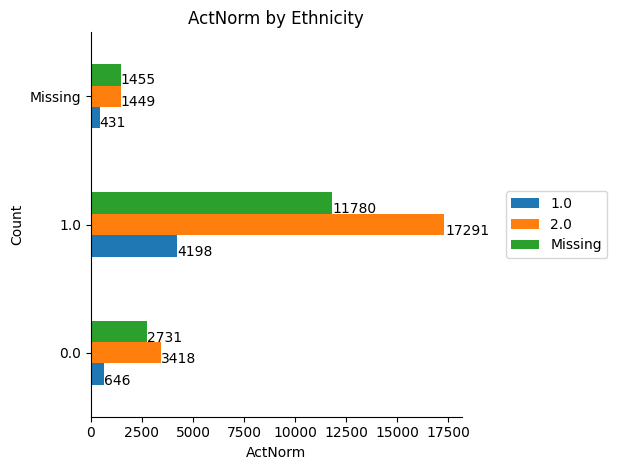

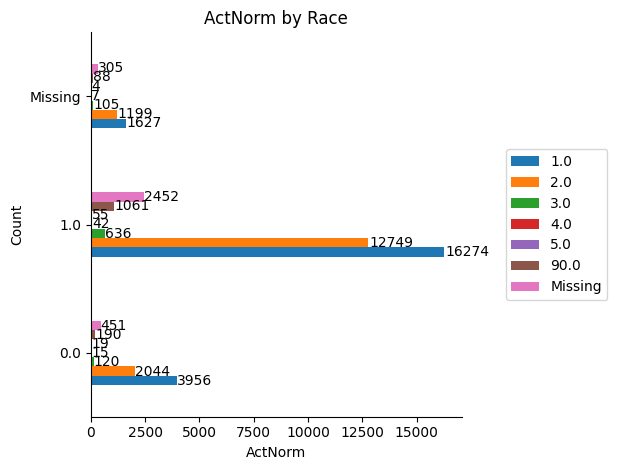

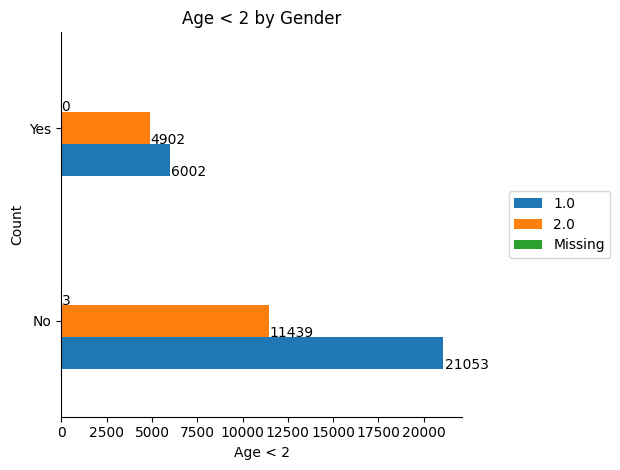

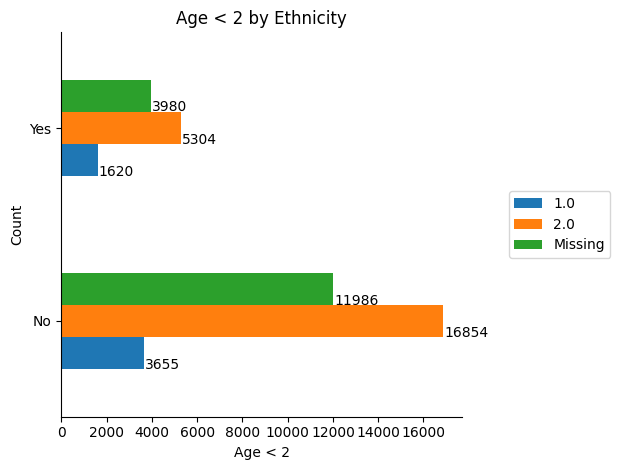

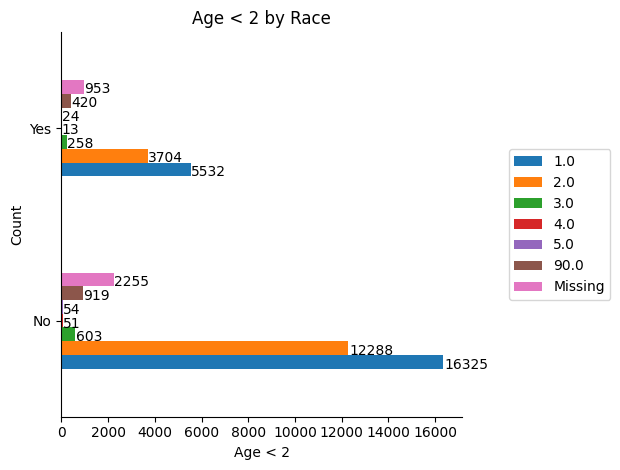

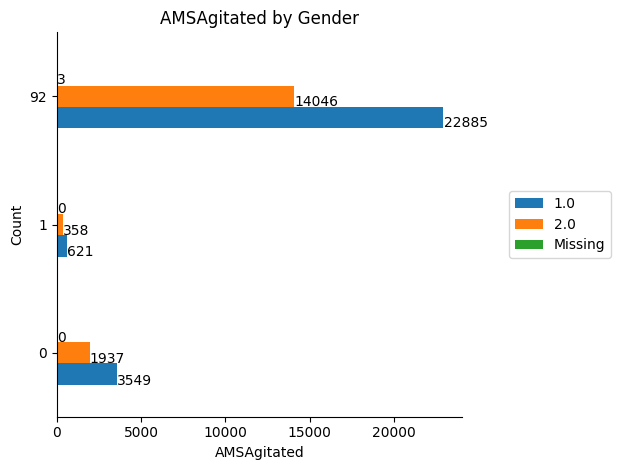

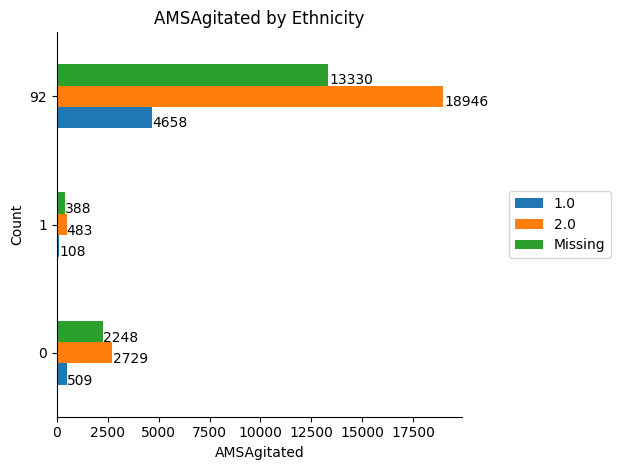

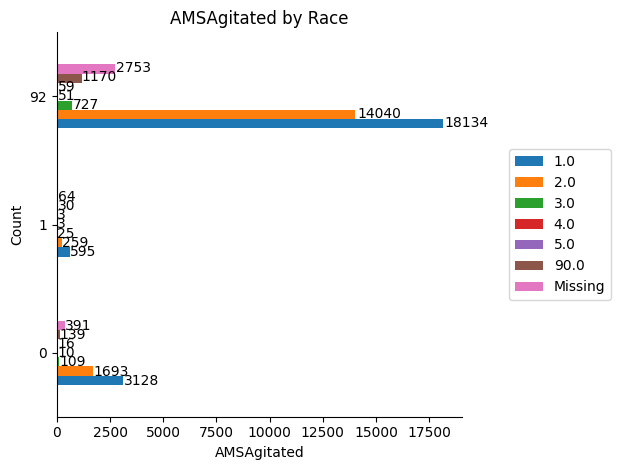

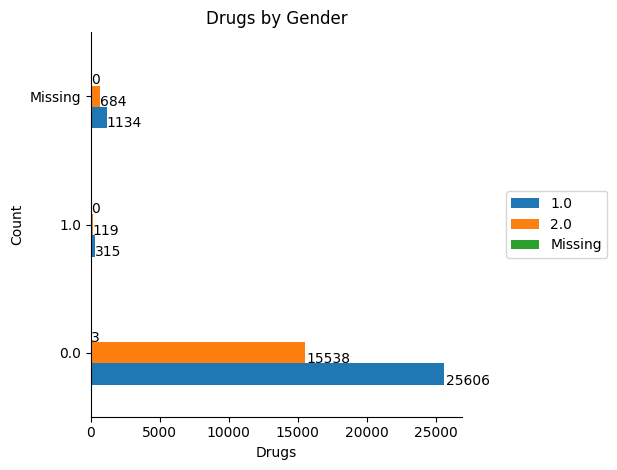

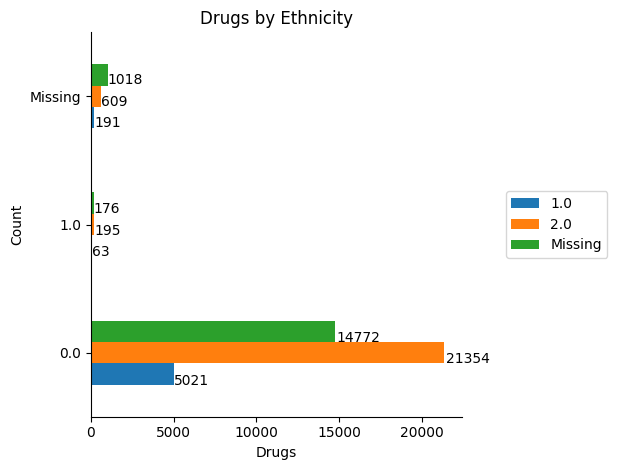

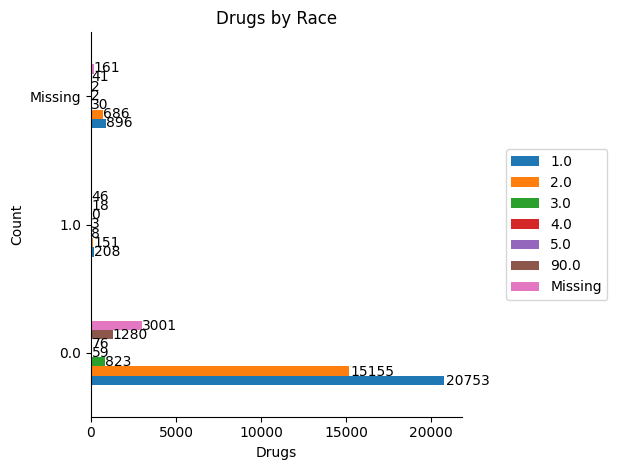

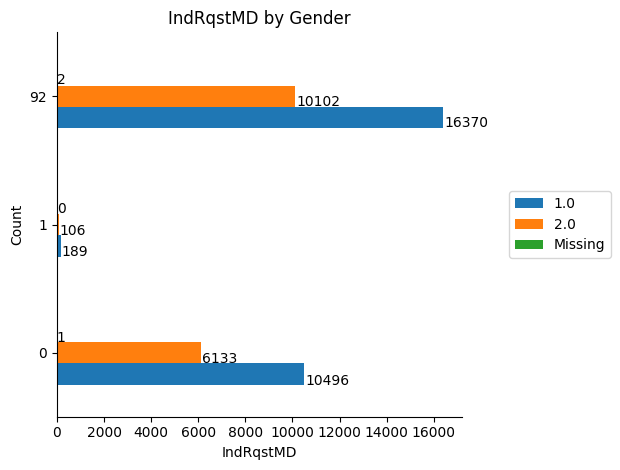

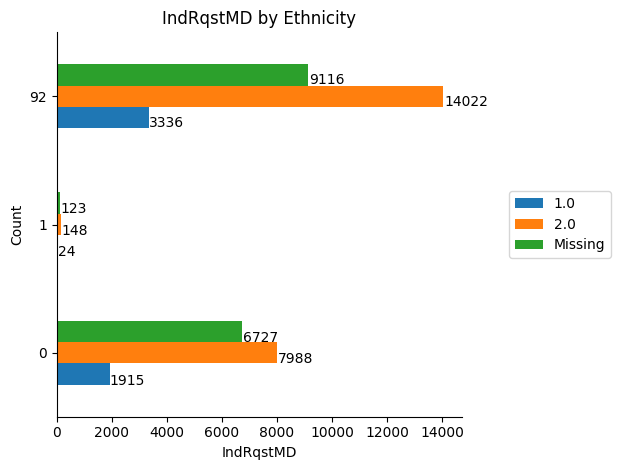

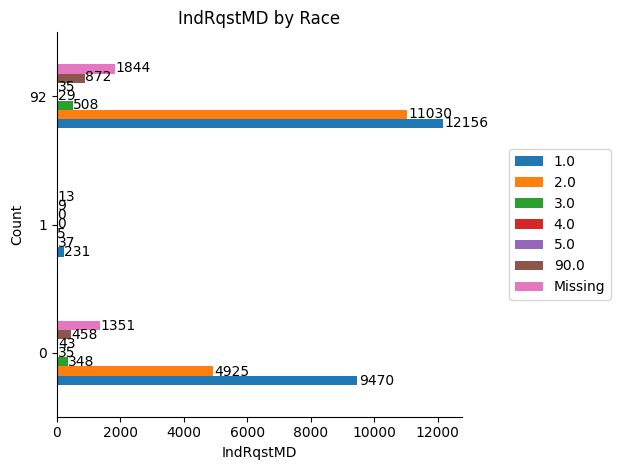

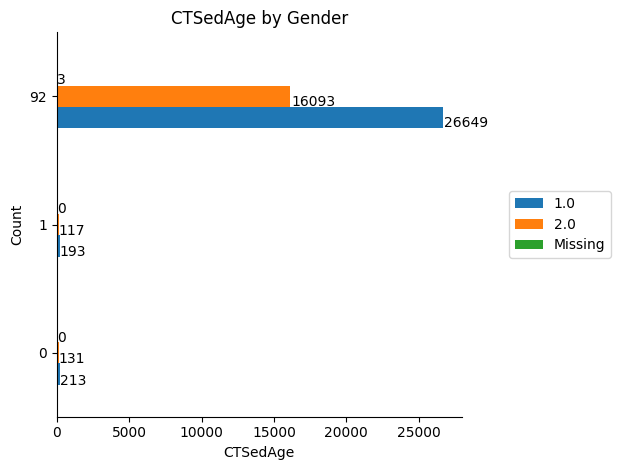

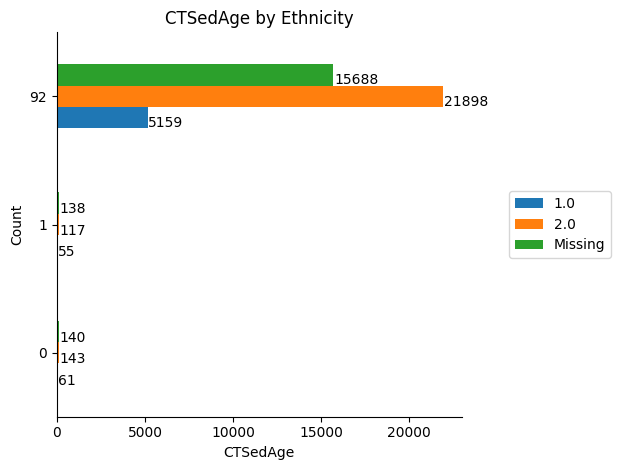

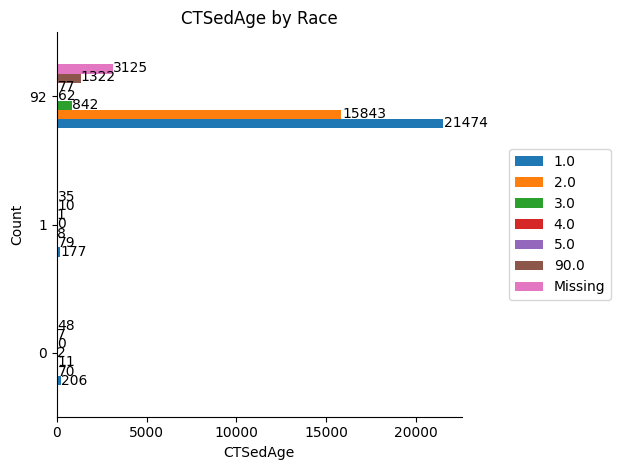

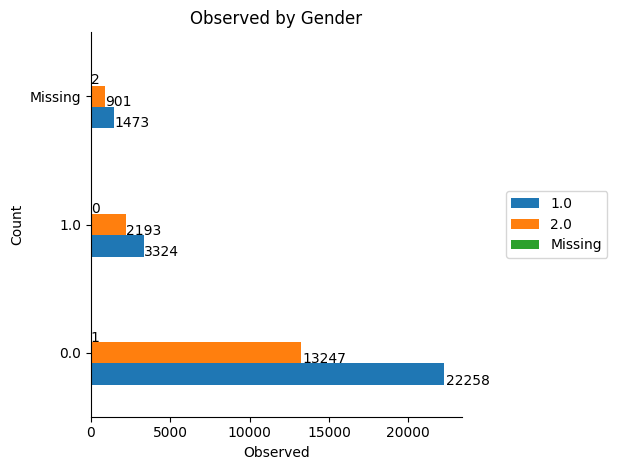

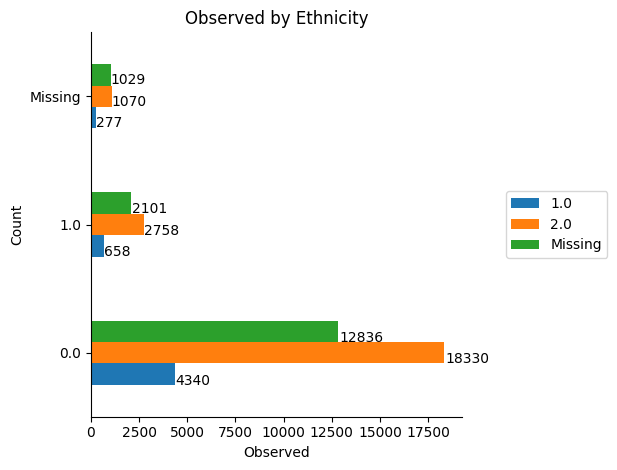

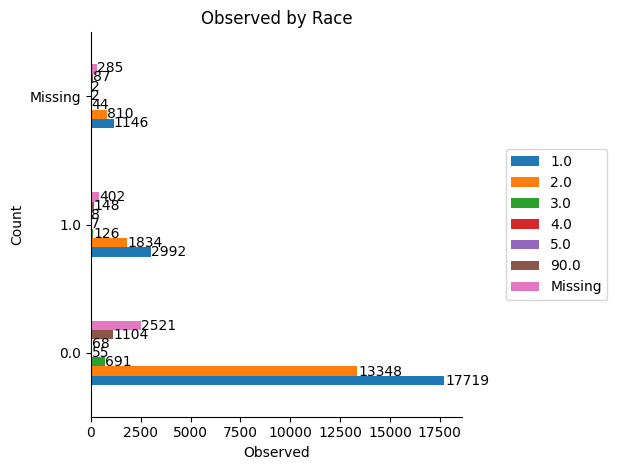

In [32]:
# plt.figure(figsize=(8, 4))
R = len(groups)
C = len(vals)
i = 0
for val in vals:
    # plot barplot of unique values for each group
    for group in groups:
        # plt.subplot(R, C, i + 1)
        d = df.groupby(group)[val].value_counts().unstack(0)
        d.plot.barh()

        # add text annotation to the right of each bar
        for p in plt.gca().patches:
            plt.gca().annotate(str(int(p.get_width())), (p.get_width() * 1.005, p.get_y() * 1.005))
        plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))


        # for p in plt.gca().patches:
            # plt.gca().annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

        plt.title(val + ' by ' + group)
        plt.xlabel(val)
        plt.ylabel('Count')
        plt.tight_layout()
        # plt.show()
        i += 1
# plt.show()